Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [25]:
%matplotlib inline

In [56]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [4]:
df = nsfg.ReadFemPreg()
df.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'laborfor_i',      u'religion_i',         u'metro_i',
               u'basewgt', u'adj_mod_basewgt',        u'finalwgt',
                u'secu_p',            u'sest',         u'cmintvw',
           u'totalwgt_lb'],
      dtype='object', length=244)

In [43]:
totalwgt_data = df.totalwgt_lb
# totalwgt_data = thinkstats2.SampleRows(totalwgt_data, 5000)

In [44]:
age_data = df.agepreg
# age_data = thinkstats2.SampleRows(age_data, 5000)

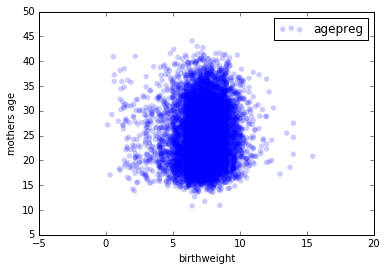

In [47]:
thinkplot.Scatter(totalwgt_data, age_data)
thinkplot.Show(xlabel = 'birthweight', ylabel = 'mothers age')

In [59]:
# df = df.dropna(subset = ['htm3', 'wtkg2'])
bins = np.arange(0, 20, 5)
indices = np.digitize(df, bins)
groups = df.groupby(indices)

In [62]:
heights, s = [group.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.age) for i, group in groups]

for percent in [75, 50, 25]: 
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' %percent
    thinkplot.Plot(heights, weights, label)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)